        Aerosol- und Nanotechnologie II | Florian Möller | Matr.-Nr. 4223486 | Abgabe: 01.05.22

# Task 3

In this task, the volume of a CSTR should be optimized at a constant volume flow rate, at which the average particle diameter of $3.5 \cdot 10^{-9}~\mathrm{m}$ is produced. At the beginning, the proceed is the same like Task 1.

In [1]:
import numpy as np
import scipy.integrate
from matplotlib import pyplot as plt

### Parameter

In [2]:

dp_min = 0.5e-9                          # [m]
dp_max = 1000e-9                         # [m]
vp_min = np.pi * (dp_min)**3  /6          # [m^3] 
vp_max = np.pi * (dp_max)**3  /6         # [m^3] 
vp_num = int(np.log(vp_max / vp_min) // np.log(2) + 2) 
vp = np.zeros((vp_num))
for i in range(vp_num): 
    vp[i] = vp_min * 2**i 
dp = ( 6 * vp/ np.pi)**(1/3.0) 

Q = 0.5 # volume flow [m^3/s]

N_0 = 1e17 # number of particle at the beginning
A = 1e-1 # for q(v) (analytic solution)

### Funktionen

In [3]:
def fun_q(v): 
    return A * v **(1/3)

def dp_avg(n, dp): # calculating the average particle diameter from the distribution
    return np.sum(n * dp) / np.sum(n)

def an_n(v, tau): # definition from analytic solution as an function
    return (1/(A * v**(1/3.0))) * np.exp(
            (3/2.0) * (vp_min**(2/3.0) - v**(2/3.0))/(A * tau)
            ) * (N_0 / tau) 


## Optimization of the reactor volume

To optimise the reactor volume, a loop is used that adjusts the residence time backward. First, a start residence time is estimated analytically, which is reduced with each step in the loop. It is important, that the required residence time is smaller than the starting residence time. 

In [4]:
tau_an = 1 
while tau_an > 1e-15:

    n_an = an_n(vp, tau_an)        # calculating the particle distribution with the analytic form
    dp_av_an = dp_avg(n_an, dp)    # calculating the average particle diameter with the analytic distribution
    diff = (3.5e-9-dp_av_an)**2    # Difference between searched value and current value
    
    if diff < 1e-31: # limit value as an termination criterion
        print('tau_an = ', tau_an, ', diff = ', diff, 'B = ', tau_an*Q)
        break
    
    if diff < 1e-30:    # boundary to increase the resolution to save processing power
        tau_an = 0.99999999*tau_an
    else:
        tau_an = 0.9999*tau_an

tau_an =  3.3197239676150475e-10 , diff =  9.995586146627857e-32 B =  1.6598619838075238e-10


### Plots

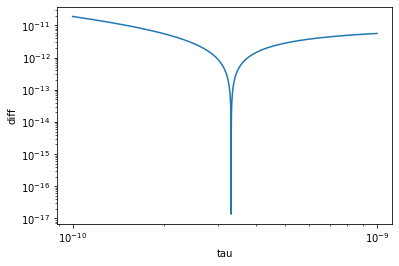

In [5]:
tau = np.linspace(1e-10, 1e-9, 100000) # dummy-tau for visualization
diff = np.zeros(len(tau))

for i in range(len(tau)): # dummy loop for visualization; condition: it is necessary to know the rea in which the tau you are looking for is located
    n = an_n(vp, tau[i])
    dp_av = dp_avg(n, dp)
    diff[i] = np.abs(3.5e-9-dp_av)

fig, ax = plt.subplots()
plt.plot(tau, diff)
plt.xlabel('tau')
plt.ylabel('diff')
ax.set_yscale('log')

ax.set_xscale('log')